In [1]:
import numpy as np


from pylab import rcParams
rcParams['figure.figsize'] = 12,9

# импортируем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go
import plotly.express as px


init_notebook_mode(connected=True)

**1.Загрузить файл hr.csv.**

In [2]:
hr = pd.read_csv('HR.csv')
hr['count'] = '1'

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,count
0,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,0.37,0.52,2,159,3,0,1,0,sales,low,1


**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

**3.Рассчитать и визуализировать корреляционную матрицу для переменных.**


**4.Визуализировать несколько взаимосвязей между переменными.**


**5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**


**6.Рассчитать сколько работников работает в каждом департаменте.**


In [4]:
people_department = hr.filter(items=['sales','count']).groupby('sales').count()
people_department.rename(columns={'sales': 'sales', 'count': 'count_peaople'}, inplace=True)
people_department

,count_peaople
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


In [5]:
trace0 = go.Bar(
    x=people_department.index,
    y=people_department.count_peaople,
    name='Sales'
)

  
data = [trace0]
layout = {'title': 'Statistics of department people'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**7.Показать распределение сотрудников по зарплатам.**


In [6]:
people_salary = hr.filter(items=['salary','count']).groupby(by = 'salary').count()
people_salary.rename(columns={'salary': 'salary', 'count': 'count_peaople'}, inplace=True)
people_salary

,count_peaople
salary,
high,1237
low,7316
medium,6446


In [7]:
trace0 = go.Bar(
    x=people_salary.index,
    y=people_salary.count_peaople,
    name='Sales'
)

  
data = [trace0]
layout = {'title': 'Statistics of salary'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)

**8.Показать распределение сотрудников по зарплатам совместно с департаментами.**


In [8]:
people_salary_department = hr.filter(items=['sales','salary','count']).groupby(by = ['salary','sales']).count()
people_salary_department.rename(columns={'count': 'count_peaople'}, inplace=True)
people_salary_department


people_salary_department_pivot = people_salary_department.pivot_table(
                        index='sales', 
                        columns='salary', 
                        values='count_peaople', 
                        aggfunc=sum).fillna(0).applymap(float)
people_salary_department_pivot


salary,high,low,medium
sales,,,
IT,83.0,609.0,535.0
RandD,51.0,364.0,372.0
accounting,74.0,358.0,335.0
hr,45.0,335.0,359.0
management,225.0,180.0,225.0
marketing,80.0,402.0,376.0
product_mng,68.0,451.0,383.0
sales,269.0,2099.0,1772.0
support,141.0,1146.0,942.0


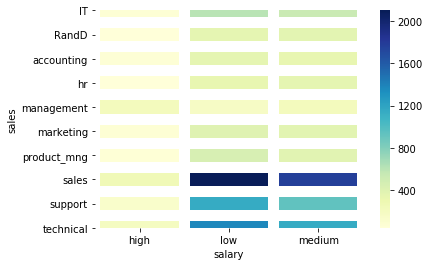

In [9]:
sns.heatmap(people_salary_department_pivot, linewidths=10, cmap="YlGnBu")

In [17]:
people_salary_department_iplotly = people_salary_department.reset_index()
fig = px.bar(people_salary_department_iplotly, x="sales", y="count_peaople", color='salary')
fig.show()


**9.Сколько сотрудников покинули компанию.**


In [11]:
left = sum(hr.left)

print(str(left) + " сотрудник покинуло компанию.")

3571 сотрудник покинуло компанию.


**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**


**Первая гипотеза: сотрудники покидают компанию из за низкой зарплаты**

In [12]:
# Таблица сотрудников с разбивкой по уровню зарплаты
people_salary = hr.filter(items=['salary','count']).groupby(by = 'salary').count()
people_salary.rename(columns={'salary': 'salary', 'count': 'count_peaople_salary'}, inplace=True)
people_salary

,count_peaople_salary
salary,
high,1237
low,7316
medium,6446


In [13]:
# Таблица покинувших компанию сотрудников с разбивкой по уровню зарплаты
people_salary_left = hr.where(hr.left==1).filter(items=['salary','count']).groupby(by = 'salary').count()
people_salary_left.rename(columns={'salary': 'salary', 'count': 'count_peaople_salary_left'}, inplace=True)
people_salary_left

,count_peaople_salary_left
salary,
high,82
low,2172
medium,1317


In [14]:
joined = people_salary.merge(people_salary_left, how='inner', on='salary')

Как мы видим почти 30% и 20% сотрудников с низким и средним доходом покиают компанию.

In [15]:
# Считаем процент сотрудников покинувших компанию
joined['count_peaople_salary_left']/joined['count_peaople_salary']*100


salary
high       6.628941
low       29.688354
medium    20.431275
dtype: float64

**Вторая гипотеза: сотрудники покидают компанию из за низкого уровня удовлетворенности**

**Третья гипотеза: сотрудники покидают компанию из за переработки по количествам часов**

За месяц должно получаться примерно 160 рабочих часов,поэтому мы определим связь между переработкой и уходом из компании.
Так же имеет смысл проверить на каких проектах происходит переработка по количеству рабочих часов number_project

**Четвертая гипотеза: сотрудники покидают компанию из за отсутствия продвижения**

В данном случае нужно учитывать сколько сотрудник уже работает в компании time_spend_company

**Пятая гипотеза: сотрудники покидают компанию из за нескольких факторов**

Рассмотрим совокупность нескольких факторов, которые в большей степени повлияли на уход сотрудника из компании.